<h1 align="center"> HR Analysis, Prediction and Visualization </b> </h1><br>
<img src=https://blueprintbusinesssolutionscorp.com/wp-content/uploads/2017/12/attrition.png>


# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home

5) **Prediction of Attrition**: LGBM Classifier

## Importing the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Understanding the Attrition Problem and the Dataset

 HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with. 
 
 Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

## Loading the Dataset

In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Print first 10 datapoints

In [3]:
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

### Getting information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Describe the dataset

In [5]:
data.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

## Plot a correlation map for all numeric variables

<Axes: >

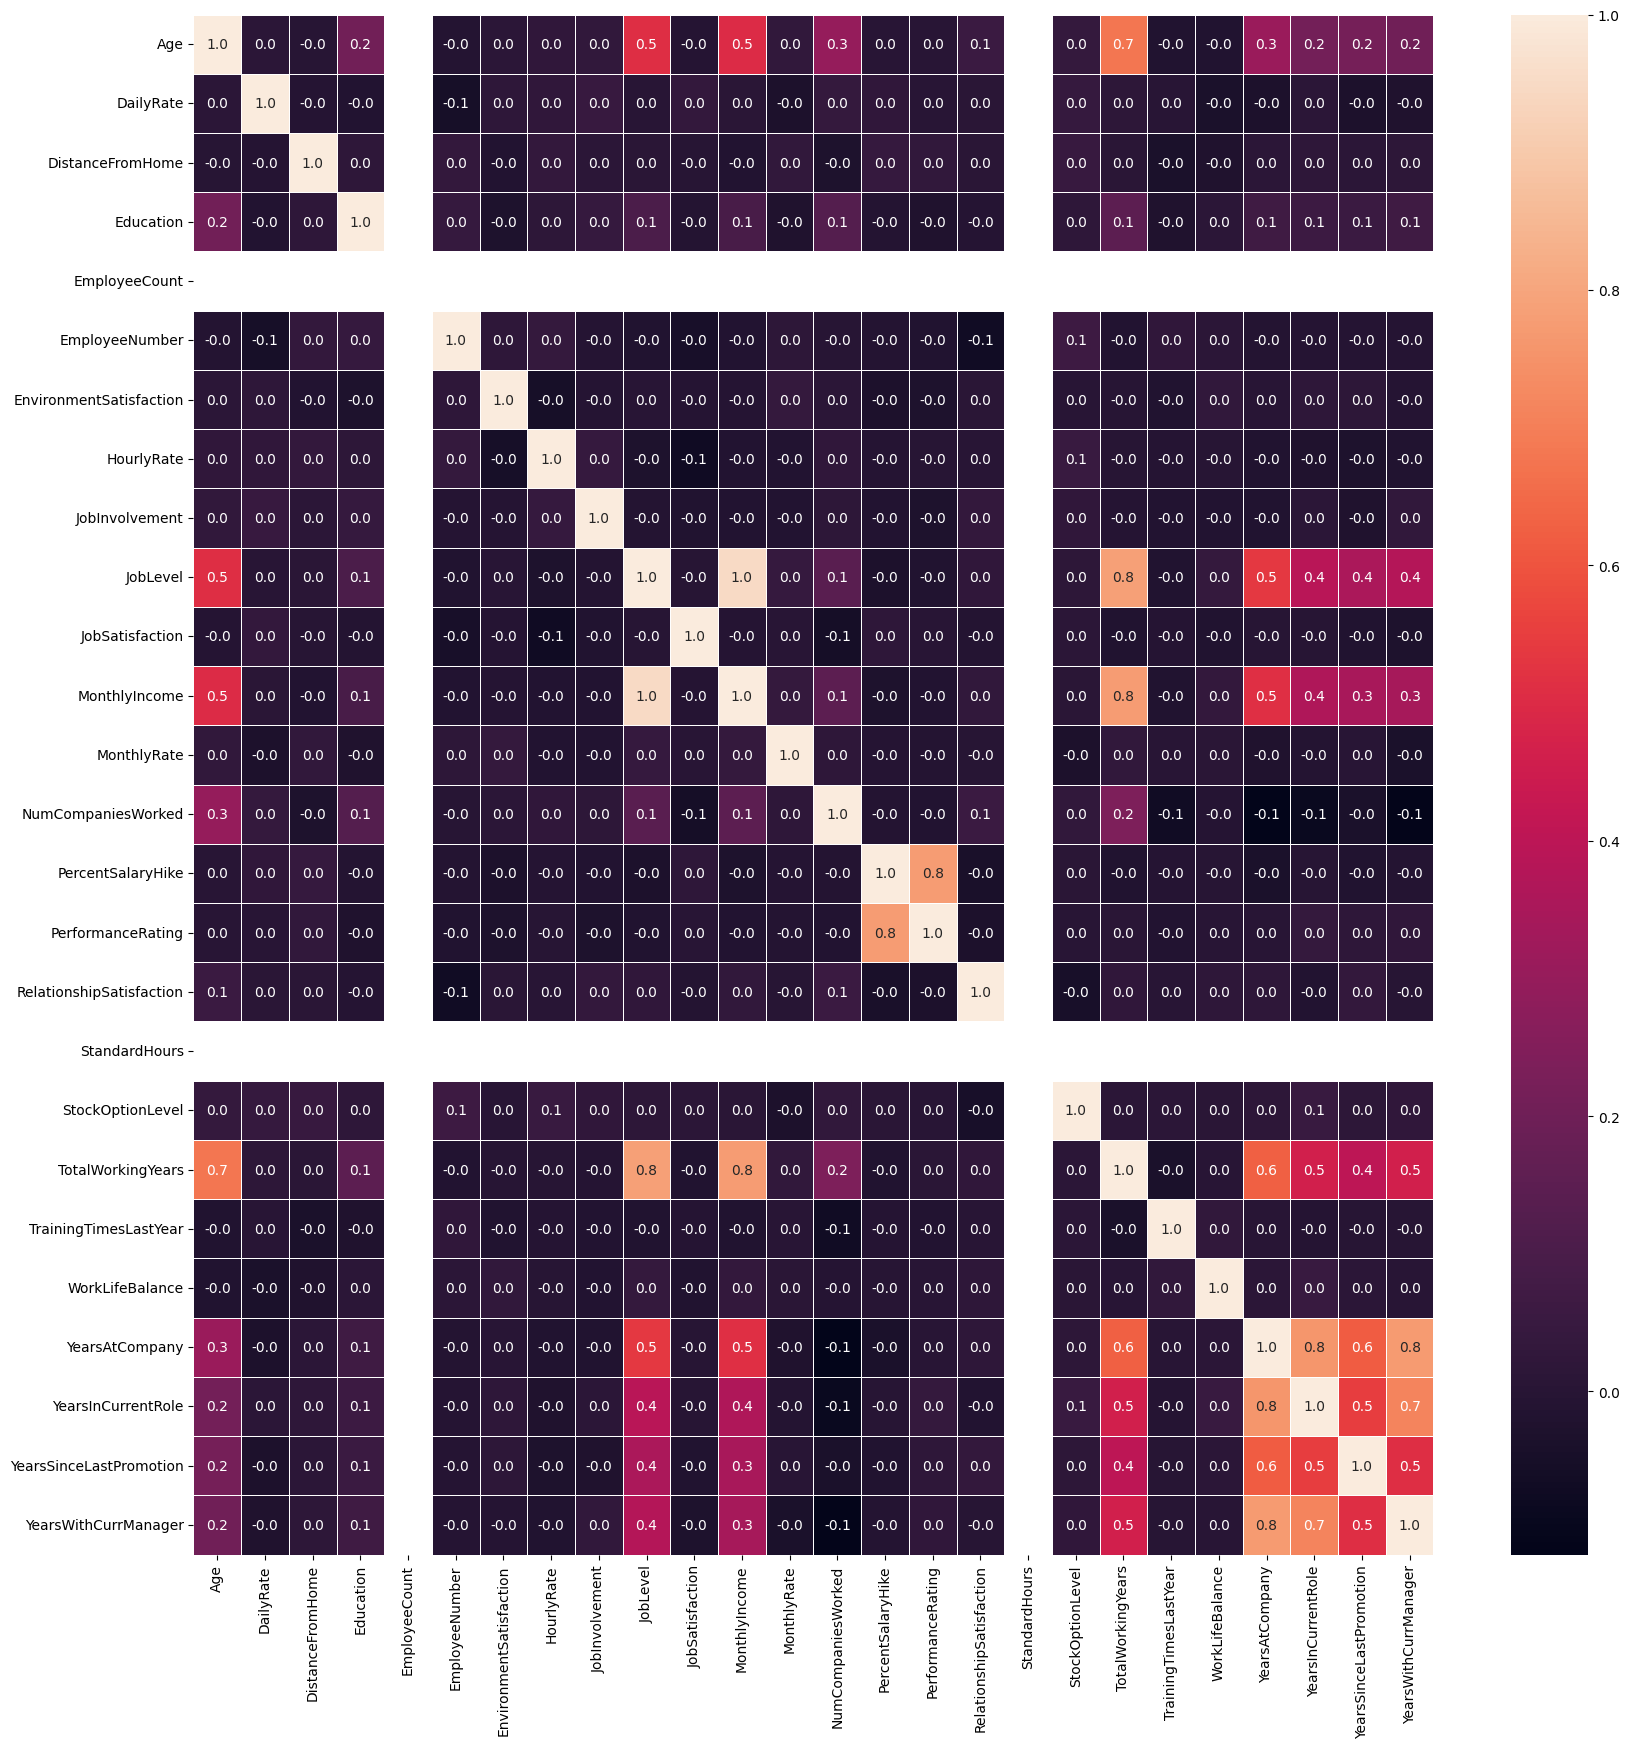

In [6]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

###### We'd now eplore the number of people based on different criteria to see which criteria is the dominat one for attrition

Text(0.5, 1.0, 'OverTime')

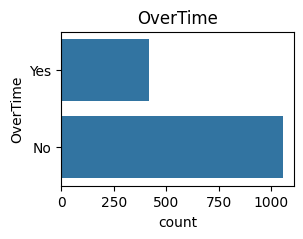

In [7]:
# count of people doing overtime
sns.countplot(data['OverTime'])
fig = plt.gcf()
fig.set_size_inches(3,2)
plt.title('OverTime')

the Count of people doing overtime < the count of people not doing overtime

Text(0.5, 1.0, 'Marital Status')

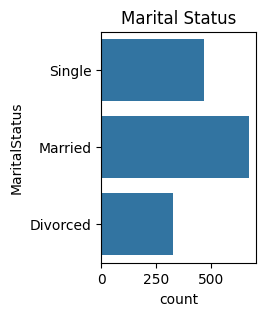

In [8]:
#count of people based on their marital status
sns.countplot(data['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Marital Status')

Text(0.5, 1.0, 'Job Role')

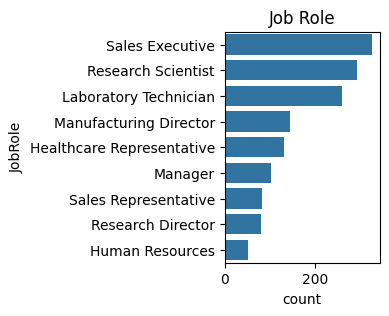

In [9]:
#count of people based on their Jobrole
sns.countplot(data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Job Role')

Text(0.5, 1.0, 'Gender')

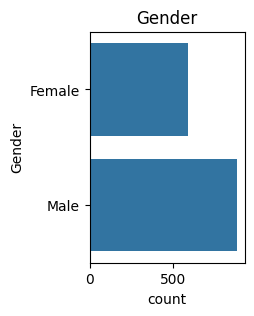

In [10]:
#count of people based on their Gender
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

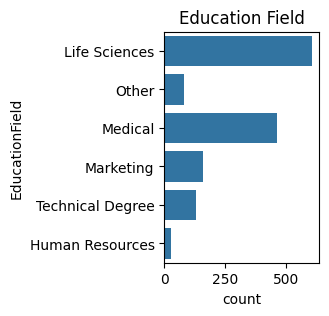

In [11]:
#count of people based on their field of education
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

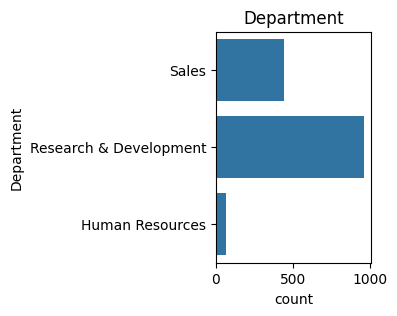

In [12]:
#count of people based on the department in which they work
sns.countplot(data['Department'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Department')

Text(0.5, 1.0, 'Business travel')

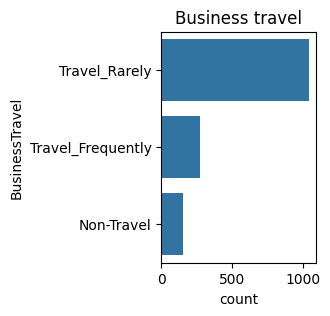

In [13]:
#count of people based on their Travel Frequency
sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(2,3)
plt.title('Business travel')

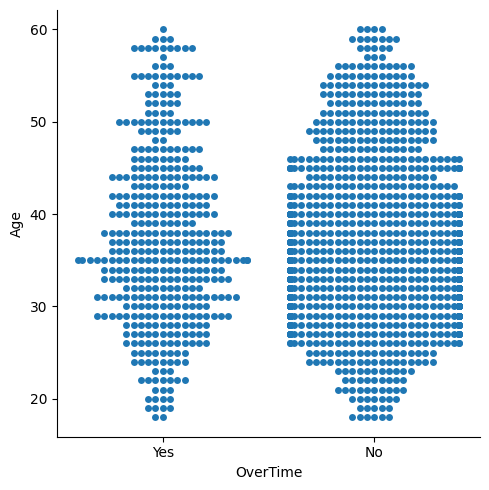

In [14]:
# analyzing the age group of the peole doing overtime
sns.catplot(x="OverTime", y="Age", kind="swarm", data=data);

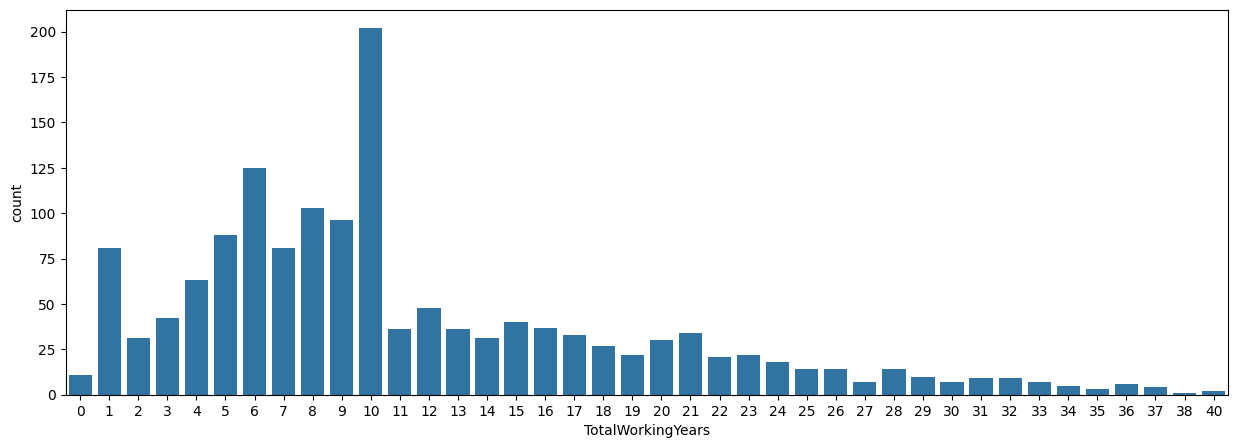

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))  # Set the figure size

# Assuming your DataFrame is named 'data', and you want to plot based on 'TotalWorkingYears'
sns.countplot(data=data, x='TotalWorkingYears')

plt.show()


<Axes: xlabel='TotalWorkingYears', ylabel='count'>

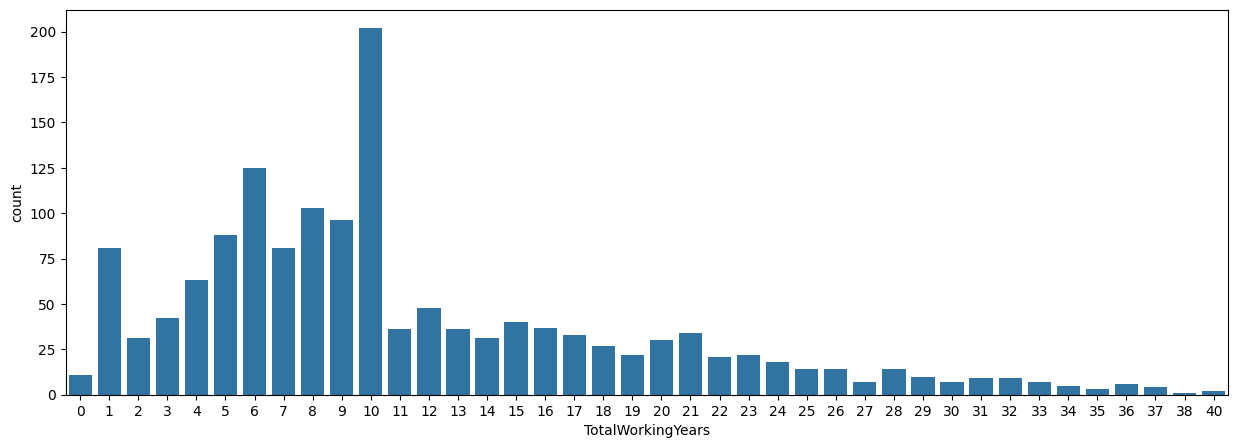

In [16]:
#count of people based on their total working years
plt.subplots(figsize=(15,5))
sns.countplot(x= data.TotalWorkingYears)

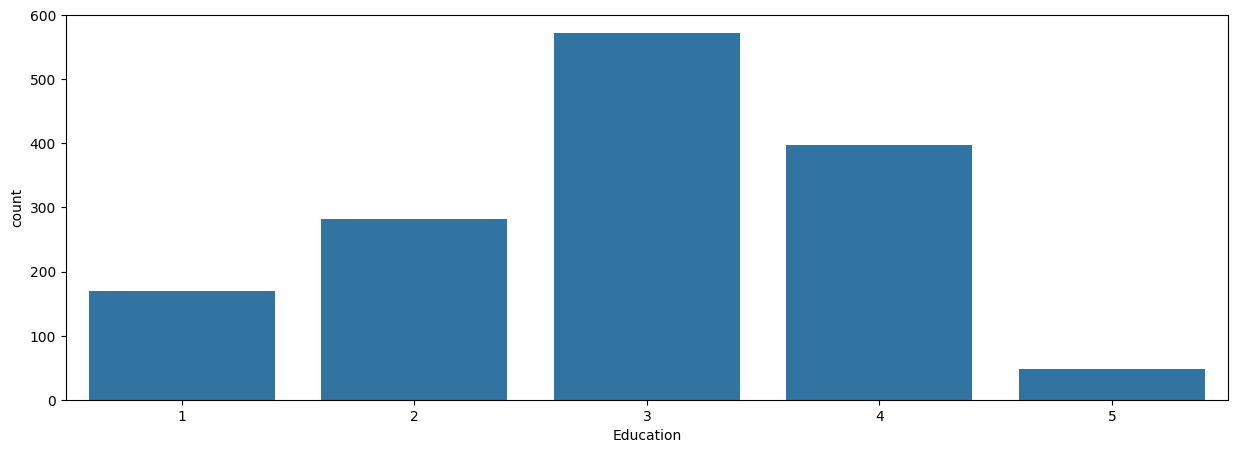

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))  # Set the figure size

# Assuming your DataFrame is named 'data', and you want to plot based on 'TotalWorkingYears'
sns.countplot(data=data, x='Education')

plt.show()


<Axes: xlabel='Education', ylabel='count'>

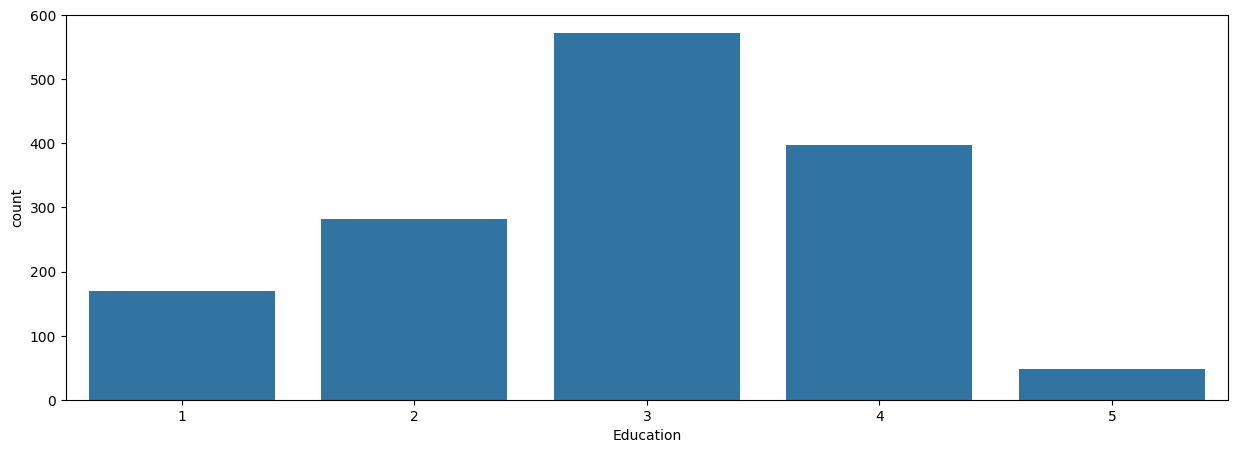

In [18]:
#count of people based on their Education
plt.subplots(figsize=(15,5))
sns.countplot(x = data.Education)

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

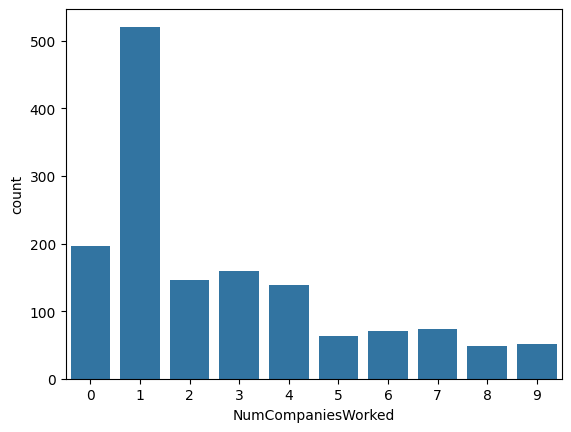

In [19]:
#count of people based on the number of companies they have worked for
#sns.countplot(data.NumCompaniesWorked)

import seaborn as sns

sns.countplot(data=data, x='NumCompaniesWorked')


<Axes: xlabel='DistanceFromHome', ylabel='count'>

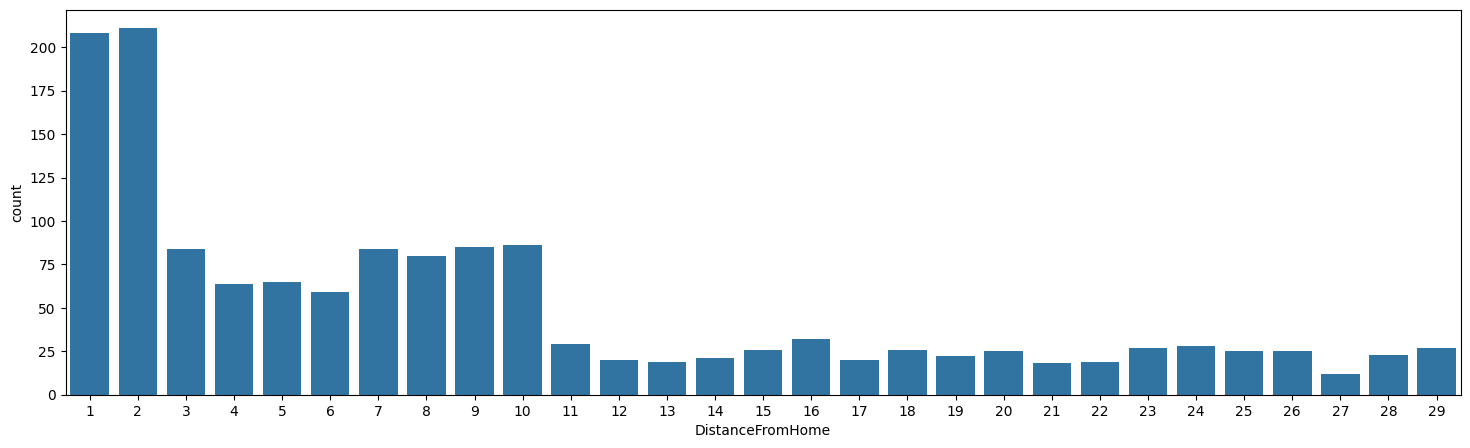

In [20]:
#count of people based on the distance from home they are working
plt.subplots(figsize=(18,5))
sns.countplot(data=data, x='DistanceFromHome')

In [21]:
# necessary imports
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [22]:
ibm_df = data # copying data to ibm_df
ibm_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [23]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range']) # creating a dataframe with custom indices

In [24]:
# initializing empty lists
numerical = []
categorical = []


for col in ibm_df.columns:
    obs = ibm_df[col].size
    p_nan = round(ibm_df[col].isna().sum()/obs, 2) # caluclating the number of missing values
    num_nan = f'{p_nan}% ({ibm_df[col].isna().sum()}/{obs})' # caluclating the number of missing values
    dtype = 'categorical' if ibm_df[col].dtype == object else 'numerical' # defining the criteria for numerical and categorical columns
    numerical.append(col) if dtype == 'numerical' else categorical.append(col) # preparing the list of categorcal and numerical columns
    rng = f'{len(ibm_df[col].unique())} labels' if dtype == 'categorical' else f'{ibm_df[col].min()}-{ibm_df[col].max()}' # the range of values in the columns
    description[col] = [obs, num_nan, dtype, rng]

In [25]:
numerical.remove('EmployeeCount') # removing EmployeeCount from numerical columns
numerical.remove('StandardHours') # removing StandardHours from numerical columns
pd.set_option('display.max_columns', 100) # displaying 100 columns atmost
display(description)
display(ibm_df.head())

Age      Attrition BusinessTravel  \
observations(rows)           1470           1470           1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)  0.0% (0/1470)   
dtype                   numerical    categorical    categorical   
range                       18-60       2 labels       3 labels   

                        DailyRate     Department DistanceFromHome  \
observations(rows)           1470           1470             1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)    0.0% (0/1470)   
dtype                   numerical    categorical        numerical   
range                    102-1499       3 labels             1-29   

                        Education EducationField  EmployeeCount  \
observations(rows)           1470           1470           1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)  0.0% (0/1470)   
dtype                   numerical    categorical      numerical   
range                         1-5       6 labels            1-1   

                   EmployeeNumber EnvironmentSatisfaction         Gender  \
observations(rows)           1470                    1470           1470   
percent missing     0.0% (0/1470)           0.0% (0/1470)  0.0% (0/1470)   
dtype                   numerical               numerical    categorical   
range                      1-2068                     1-4       2 labels   

                       HourlyRate JobInvolvement       JobLevel  \
observations(rows)           1470           1470           1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)  0.0% (0/1470)   
dtype                   numerical      numerical      numerical   
range                      30-100            1-4            1-5   

                          JobRole JobSatisfaction  MaritalStatus  \
observations(rows)           1470            1470           1470   
percent missing     0.0% (0/1470)   0.0% (0/1470)  0.0% (0/1470)   
dtype                 categorical       numerical    categorical   
range                    9 labels             1-4       3 labels   

                    MonthlyIncome    MonthlyRate NumCompaniesWorked  \
observations(rows)           1470           1470               1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)      0.0% (0/1470)   
dtype                   numerical      numerical          numerical   
range                  1009-19999     2094-26999                0-9   

                           Over18       OverTime PercentSalaryHike  \
observations(rows)           1470           1470              1470   
percent missing     0.0% (0/1470)  0.0% (0/1470)     0.0% (0/1470)   
dtype                 categorical    categorical         numerical   
range                    1 labels       2 labels             11-25   

                   PerformanceRating RelationshipSatisfaction  StandardHours  \
observations(rows)              1470                     1470           1470   
percent missing        0.0% (0/1470)            0.0% (0/1470)  0.0% (0/1470)   
dtype                      numerical                numerical      numerical   
range                            3-4                      1-4          80-80   

                   StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
observations(rows)             1470              1470                  1470   
percent missing       0.0% (0/1470)     0.0% (0/1470)         0.0% (0/1470)   
dtype                     numerical         numerical             numerical   
range                           0-3              0-40                   0-6   

                   WorkLifeBalance YearsAtCompany YearsInCurrentRole  \
observations(rows)            1470           1470               1470   
percent missing      0.0% (0/1470)  0.0% (0/1470)      0.0% (0/1470)   
dtype                    numerical      numerical          numerical   
range                          1-4           0-40               0-18   

                   YearsSinceLastPromotion YearsWithCurrManager  
observations(rows)     

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [26]:
# defining a method for calculating accuracy,search time, hyperparameters etc for different models
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [27]:
lgb_data = ibm_df.copy()
lgb_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [28]:
lgb_dummy = pd.get_dummies(lgb_data[categorical], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

Attrition_Yes  BusinessTravel_Travel_Frequently  \
0           True                             False   
1          False                              True   
2           True                             False   
3          False                              True   
4          False                             False   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          True                              False   
1                         False                               True   
2                          True                               True   
3                         False                               True   
4                          True                               True   

   Department_Sales  EducationField_Life Sciences  EducationField_Marketing  \
0              True                          True                     False   
1             False                          True                     False   
2             False                         False                     False   
3             False                          True                     False   
4             False                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                            False        False                    False   
1                            False         True                    False   
2                            False         True                    False   
3                            False        False                    False   
4                            False         True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  
0          True  
1         False  
2          True  
3          True  
4         False

In [29]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

Attrition_Yes  BusinessTravel_Travel_Frequently  \
0           True                             False   
1          False                              True   
2           True                             False   
3          False                              True   
4          False                             False   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          True                              False   
1                         False                               True   
2                          True                               True   
3                         False                               True   
4                          True                               True   

   Department_Sales  EducationField_Life Sciences  EducationField_Marketing  \
0              True                          True                     False   
1             False                          True                     False   
2             False                         False                     False   
3             False                          True                     False   
4             False                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                            False        False                    False   
1                            False         True                    False   
2                            False         True                    False   
3                            False        False                    False   
4                            False         True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  Age Attrition     BusinessTravel  DailyRate  \
0          True   41       Yes      Travel_Rarely       1102   
1         False   49        No  Travel_Frequently        279   
2          True   37       Yes      Travel_Rarely       1373   
3          True   33        No  Travel_Frequently       1392   
4         False   27        No      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales 

In [30]:
lgb_data.drop(columns = categorical, inplace=True) # dropping the old categorical columns
lgb_data.head()

Attrition_Yes  BusinessTravel_Travel_Frequently  \
0           True                             False   
1          False                              True   
2           True                             False   
3          False                              True   
4          False                             False   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          True                              False   
1                         False                               True   
2                          True                               True   
3                         False                               True   
4                          True                               True   

   Department_Sales  EducationField_Life Sciences  EducationField_Marketing  \
0              True                          True                     False   
1             False                          True                     False   
2             False                         False                     False   
3             False                          True                     False   
4             False                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                            False        False                    False   
1                            False         True                    False   
2                            False         True                    False   
3                            False        False                    False   
4                            False         True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          True   41       1102                 1          2              1   
1         False   49        279                 8          1              1   
2          True   37       1373                 2          2              1   
3          True   33       1392                 3          4              1   
4         False   27        591                 2          1              1   

   Employ

In [31]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

Attrition  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0       True                             False                          True   
1      False                              True                         False   
2       True                             False                          True   
3      False                              True                         False   
4      False                             False                          True   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                          True                     False   
2                         False                     False   
3                          True                     False   
4                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                            False        False                    False   
1                            False         True                    False   
2                            False         True                    False   
3                            False        False                    False   
4                            False         True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          True   41       1102                 1          2              1   
1         False   49        279                 8          1              1   
2          True   37       1373                 2          2              1   
3          True   33       1392                 3          4              1   
4         False   27        591                 2          1              1   

   EmployeeNumber  EnvironmentSat

In [32]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())


0     True
1    False
2     True
3    False
4    False
Name: Attrition, dtype: bool

In [33]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                             False                          True   
1                              True                         False   
2                             False                          True   
3                              True                         False   
4                             False                          True   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                          True                     False   
2                         False                     False   
3                          True                     False   
4                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2                   False                  True   
3                   False                 False   
4                    True                 False   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                            False        False                    False   
1                            False         True                    False   
2                            False         True                    False   
3                            False        False                    False   
4                            False         True                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          True   41       1102                 1          2              1   
1         False   49        279                 8          1              1   
2          True   37       1373                 2          2              1   
3          True   33       1392                 3          4              1   
4         False   27        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0               1        

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [35]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
680                              False                          True   
648                               True                         False   
803                              False                         False   
1356                             False                          True   
1458                             False                          True   

      Department_Research & Development  Department_Sales  \
680                                True             False   
648                               False              True   
803                                True             False   
1356                              False              True   
1458                               True             False   

      EducationField_Life Sciences  EducationField_Marketing  \
680                          False                     False   
648                          False                     False   
803                           True                     False   
1356                         False                      True   
1458                          True                     False   

      EducationField_Medical  EducationField_Other  \
680                    False                  True   
648                     True                 False   
803                    False                 False   
1356                   False                 False   
1458                   False                 False   

      EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
680                             False         True                    False   
648                             False        False                    False   
803                             False         True                    False   
1356                            False        False                    False   
1458                            False        False                    False   

      JobRole_Laboratory Technician  JobRole_Manager  \
680                           False            False   
648                           False            False   
803                           False            False   
1356                          False            False   
1458                          False            False   

      JobRole_Manufacturing Director  JobRole_Research Director  \
680                            False                      False   
648                            False                      False   
803                            False                      False   
1356                           False                      False   
1458                           False                      False   

      JobRole_Research Scientist  JobRole_Sales Executive  \
680                         True                    False   
648                        False                    False   
803                         True                    False   
1356                       False                     True   
1458                        True                    False   

      JobRole_Sales Representative  MaritalStatus_Married  \
680                          False                  False   
648                           True                   True   
803                          False                   True   
1356                         False                   True   
1458                         False                   True   

      MaritalStatus_Single  OverTime_Yes  Age  DailyRate  DistanceFromHome  \
680                   True         False   36        188                 7   
648                  False         False   37       1231                21   
803                  False         False   34        697                 3   
1356                 False         False   41        337                 8   
1458                 False         False   35        287                 1   

      Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
680

Sample Test Data


BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1000                             False                          True   
995                              False                          True   
270                              False                          True   
845                               True                         False   
794                               True                         False   

      Department_Research & Development  Department_Sales  \
1000                               True             False   
995                                True             False   
270                                True             False   
845                                True             False   
794                                True             False   

      EducationField_Life Sciences  EducationField_Marketing  \
1000                         False                     False   
995                          False                     False   
270                          False                     False   
845                          False                     False   
794                           True                     False   

      EducationField_Medical  EducationField_Other  \
1000                   False                  True   
995                     True                 False   
270                     True                 False   
845                     True                 False   
794                    False                 False   

      EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
1000                            False        False                    False   
995                             False        False                    False   
270                             False         True                    False   
845                             False        False                    False   
794                             False         True                    False   

      JobRole_Laboratory Technician  JobRole_Manager  \
1000                           True            False   
995                           False            False   
270                           False             True   
845                           False            False   
794                           False            False   

      JobRole_Manufacturing Director  JobRole_Research Director  \
1000                           False                      False   
995                            False                      False   
270                            False                      False   
845                            False                      False   
794                            False                      False   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1000                       False                    False   
995                         True                    False   
270                        False                    False   
845                         True                    False   
794                        False                    False   

      JobRole_Sales Representative  MaritalStatus_Married  \
1000                         False                   True   
995                          False                  False   
270                          False                  False   
845                          False                   True   
794                          False                  False   

      MaritalStatus_Single  OverTime_Yes  Age  DailyRate  DistanceFromHome  \
1000                 False         False   52        258                 8   
995                   True          True   43        930                 6   
270                   True          True   55        452                 1   
845                  False          True   40        902                26   
794                   True         False   34        618                 3   

      Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
100

In [36]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


680     False
648     False
803     False
1356    False
1458    False
Name: Attrition, dtype: bool

Sample Test Labels


1000    False
995     False
270     False
845     False
794     False
Name: Attrition, dtype: bool

In [37]:
# method to return the loss and the different accuracies for LGB model
def lgb_objective(space, early_stopping_rounds=50):
    
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )
    
    lgbm.fit(train_x, train_y, 
            eval_set = [(train_x, train_y), (test_x, test_y)],
            early_stopping_rounds = early_stopping_rounds,
            eval_metric = 'auc',
            verbose = False)
    
    predictions = lgbm.predict(test_x)
    test_preds = lgbm.predict_proba(test_x)[:,1]
    train_preds = lgbm.predict_proba(train_x)[:,1]
    
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }


In [38]:
'''
trials = Trials()
# defining parameters for LGB 
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

#  defining the hyper parameters
lgb_hyperparams = fmin(fn = lgb_objective, 
                 max_evals = 150, 
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM') # calling the org_results function previously defined
display(lgb_results)
'''

"\ntrials = Trials()\n# defining parameters for LGB \nspace = {\n    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),\n    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),\n    'max_depth': hp.quniform('max_depth', 1, 15, 1),\n    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),\n    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), \n    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),\n    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),\n    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),\n    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)\n}\n\n#  defining the hyper parameters\nlgb_hyperparams = fmin(fn = lgb_objective, \n                 max_evals = 150, \n                 trials = trials,\n                 algo = tpe.suggest,\n                 space = space\n                 )\n\nlgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM') # calling the org_results function previously defined

In [39]:
'''# Importing necessary libraries
from lightgbm.sklearn import LGBMClassifier
from hyperopt import hp, tpe, fmin
from hyperopt import Trials

# Define the objective function for optimization
def lgb_objective(space):
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )
    
    lgbm.fit(train_x, train_y, 
            eval_set = [(train_x, train_y), (test_x, test_y)],
            eval_metric = 'auc',
            verbose = False)
    
    predictions = lgbm.predict(test_x)
    test_preds = lgbm.predict_proba(test_x)[:,1]
    train_preds = lgbm.predict_proba(train_x)[:,1]
    
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }

# Define the search space
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

# Initialize Trials object
trials = Trials()

# Perform hyperparameter optimization
lgb_hyperparams = fmin(fn=lgb_objective, 
                      max_evals=150, 
                      trials=trials, 
                      algo=tpe.suggest, 
                      space=space)

# Process the results (assuming you have a function org_results)
lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM')

# Display the results
display(lgb_results)
'''

"# Importing necessary libraries\nfrom lightgbm.sklearn import LGBMClassifier\nfrom hyperopt import hp, tpe, fmin\nfrom hyperopt import Trials\n\n# Define the objective function for optimization\ndef lgb_objective(space):\n    lgbm = LGBMClassifier(\n        learning_rate = space['learning_rate'],\n        n_estimators= int(space['n_estimators']), \n        max_depth = int(space['max_depth']),\n        num_leaves = int(space['num_leaves']),\n        colsample_bytree = space['colsample_bytree'],\n        feature_fraction = space['feature_fraction'],\n        reg_lambda = space['reg_lambda'],\n        reg_alpha = space['reg_alpha'],\n        min_split_gain = space['min_split_gain']\n    )\n    \n    lgbm.fit(train_x, train_y, \n            eval_set = [(train_x, train_y), (test_x, test_y)],\n            eval_metric = 'auc',\n            verbose = False)\n    \n    predictions = lgbm.predict(test_x)\n    test_preds = lgbm.predict_proba(test_x)[:,1]\n    train_preds = lgbm.predict_proba(tra

In [40]:
from lightgbm.sklearn import LGBMClassifier
from hyperopt import hp, tpe, fmin
from hyperopt import Trials
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

# Define the objective function for optimization
def lgb_objective(space):
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain'],
        verbosity = 1  # Adjust the verbosity level as needed (0, 1, 2, or 3)
    )
    
    lgbm.fit(train_x, train_y, 
            eval_set = [(train_x, train_y), (test_x, test_y)],
            eval_metric = 'auc'
           )
    
    predictions = lgbm.predict(test_x)
    test_preds = lgbm.predict_proba(test_x)[:,1]
    train_preds = lgbm.predict_proba(train_x)[:,1]
    
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }

# Define the search space
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

# Initialize Trials object
trials = Trials()

# Perform hyperparameter optimization
lgb_hyperparams = fmin(fn=lgb_objective, 
                      max_evals=150, 
                      trials=trials, 
                      algo=tpe.suggest, 
                      space=space)

# Process the results (assuming you have a function org_results)
lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM')

# Display the results
display(lgb_results)


[LightGBM] [Warning] feature_fraction is set=0.6888235156986107, colsample_bytree=0.7838896749861849 will be ignored. Current value: feature_fraction=0.6888235156986107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6888235156986107, colsample_bytree=0.7838896749861849 will be ignored. Current value: feature_fraction=0.6888235156986107
[LightGBM] [Info] Number of positive: 183, number of negative: 993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                      
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.6888235156986107, colsample_bytree=0.7838896749861849 will be ignored. Current value: feature_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] feature_fraction is set=0.673541531909239, colsample_bytree=0.8934298581802971 will be ignored. Current value: feature_fraction=0.673541531909239
[LightGBM] [Warning] feature_fraction is set=0.673541531909239, colsample_bytree=0.893

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Info] Total Bins 1404                                                 
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.8725955780617758, colsample_bytree=0.5578194623138717 will be ignored. Current value: feature_fraction=0.8725955780617758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines   
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245   
[LightGBM] [Info] Start training from score -1.691245                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Info] Number of positive: 183, number of negative: 993                 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.9152018735979774, colsample_bytree=0.30200742731460223 will be ignored. Current value: feature_fraction=0.9152018735979774
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Warning] feature_fraction is set=0.9963756371774843, colsample_bytree=0.6583955514953126 will be ignored. Current value: feature_fraction=0.9963756371774843
[LightGBM] [Info] Number of positive: 183, number of negative: 993                 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.9963756371774843, colsample_bytree=0.6583955514953126 will be ignored. Current value: feature_fraction=0.9963756371774843
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] feature_fraction is set=0.7232649778467959, colsample_bytree=0.4713288812058752 will be ignored. Current value: feature_fraction=0.7232649778467959
[LightGBM] [Warning] feature_fraction is set=0.7232649778467959, colsample_bytree=0.4713288812058752 will be ignored. Current value: feature_fraction=0.7232649778467959
[LightGBM] [Warning] feature_fraction is set=0.7232649778467959, colsample_bytree=0.4713288812058752 will be ignored. Current value: feature_fraction=0.723264

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] feature_fraction is set=0.3125237492914797, colsample_bytree=0.7118520168948752 will be ignored. Current value: feature_fraction=0.31252374

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.5427601060418651, colsample_bytree=0.847506741336466 will be ignored. Current value: feature_fraction=0.5427601060418651
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] feature_fraction is set=0.5427601060418651, colsample_bytree=0.847506741336466 will be ignored. Current value: feature_fraction=0.5427601060418651
[LightGBM] [Warning] feature_fraction is set=0.5427601060418651, colsample_bytree=0.847506741336466 will be ignored. Current value: feature_fraction=0.5427601060418651
[LightGBM] [Warning] feature_fraction is set=0.5427601060418651, colsample_bytree=0.847506741336466 will be ignored. Current value: feature_fraction=0.5

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] feature_fraction is set=0.5541734479327716, colsample_bytree=0.8002940398181286 will be ignored. Current value: feature_fraction=0.55417344

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] feature_fraction is set=0.4812242536973849, colsample_bytree=0.8914502496308138 will be ignored. Current value: feature_fraction=0.4812242536973849
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] feature_fraction is set=0.6854223058097567, colsample_bytree=0.7928664618312496 will be ignored. Current value: feature_fraction=0.6854223058097567
[LightGBM] [Warning] feature_fraction is set=0.6854223058097567, colsample_bytree=0.7928664618312496 will be ignored. Current value: feature_fraction=0.6854223058097567
[LightGBM] [Warning] feature_fraction is set=0.5983150457786456, colsample_bytree=0.919067197449396 will be ignored. Current value: feature_fraction=0.5983150457786456
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Warning] feature_fraction is set=0.5983150457786456, colsample_bytree=0.919067197449396 will be ignored. Current value: feature_fraction=0.5983150457786456
[LightGBM] [Info] Number of positive: 183, number of negative: 993                 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_col_wise=true` to remove the overhe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.6605144156683858, colsample_bytree=0.8619190451490608 will be ignored. Current value: feature_fraction=0.6605144156683858
[LightGBM] [Warning] feature_fraction is set=0.6605144156683858, colsample_bytree=0.8619190451490608 will be ignored. Current value: feature_fraction=0.6605144156683858
[LightGBM] [Warning] feature_fraction is set=0.6605144156683858, colsample_bytree=0.8619190451490608 will be ignored. Current value: feature_fraction=0.6605144156683858
[LightGBM] [Warning] feature_fraction is set=0.39193023781442937, colsample_bytree=0.9655892502710894 will be ignored

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.8470862836226413, colsample_bytree=0.44303974829328246 will be ignored. Current value: feature_fraction=0.8470862836226413
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] feature_fraction is set=0.41280868905746176, colsample_bytree=0.5370174278711448 will be ignored. Current value: feature_fraction=0.41280868905746176
[LightGBM] [Warning] feature_fraction is set=0.41280868905746176, colsample_bytree=0.5370174278711448 will be ignored. Current value: feature_fraction=0.4128

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] feature_fraction is set=0.3923597586149245, colsample_bytree=0.9108136399106054 will be ignored. Current value: feature_fraction=0.3923597586149245
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Warning] feature_fraction is set=0.3923597586149245, colsample_bytree=0.9108136399106054 will be ignored. Current value: feature_fraction=0.3923597586149245
[LightGBM] [Info] Number of positive: 183, number of negative: 993                 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.3923597586149245, colsample_bytree=0.91081363

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] feature_fraction is set=0.3923597586149245, colsample_bytree=0.9108136399106054 will be ignored. Current value: feature_fraction=0.3923597586149245
[LightGBM] [Warning] feature_fraction is set=0.44180355493490236, colsample_bytree=0.8130763893910176 will be ignored. Current value: feature_fraction=0.44180355493490236
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Warning] feature_fraction is set=0.44180355493490236, colsample_bytree=0.8130763893910176 will be ignored. Current value: feature_fraction=0.44180355493490236
[LightGBM] [Info] Number of positive: 183, number of negative: 993                 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.33259484179139676, colsample_bytree=0.5919849643276032 will be ignored. Current value: feature_fraction=0.33259484179139676
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf      

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] feature_fraction is set=0.7129786902872772, colsample_bytree=0.7904760949089735 will be ignored. Current value: feature_fraction=0.71297869

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
 49%|████▉     | 74/150 [07:04<05:45,  4.55s/trial, best loss: 0.16041666666666665][LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warn

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] feature_fraction is set=0.750881018225864, colsample_bytree=0.8796317655431514 will be ignored. Current value: feature_fraction=0.750881018225864
[LightGBM] [Warning] feature_fraction is set=0.750881018225864, colsample_bytree=0.8796317655431514 will be ignored. Current value: feature_fraction=0.750881018225864
[LightGBM] [Warning] feature_fraction is set=0.750881018225864, colsample_bytree=0.8796317655431514 will be ignored. Current value: feature_fraction=0.750881018225864
[LightGBM] [Warning] feature_fraction is set=0.37766263566430075, colsample_bytree=0.6069087110754634 will be ignored. Current value: feature_fraction=0.37766263566430075
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Warning] feature_fraction is set=0.37766263566430075, colsample_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Total Bins 1404                                                  
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.3602110352468185, colsample_bytree=0.7609565260644641 will be ignored. Current value: feature_fraction=0.3602110352468185
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] feature_fraction is set=0.6177752345021829, colsample_bytree=0.6679044963211015 will be ignored. Current value: feature_fraction=0.6177752345021829
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines    
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245    
[LightGBM] [Info] Start training from score -1.691245                              
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf         
[LightGBM] [Warning] Stopped trainin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Start training from score -1.691245                               
[LightGBM] [Warning] feature_fraction is set=0.35908390511817184, colsample_bytree=0.9605445951320435 will be ignored. Current value: feature_fraction=0.35908390511817184
[LightGBM] [Warning] feature_fraction is set=0.35908390511817184, colsample_bytree=0.9605445951320435 will be ignored. Current value: feature_fraction=0.35908390511817184
[LightGBM] [Warning] feature_fraction is set=0.35908390511817184, colsample_bytree=0.9605445951320435 will be ignored. Current value: feature_fraction=0.35908390511817184
[LightGBM] [Warning] feature_fraction is set=0.30416346591170434, colsample_bytree=0.9360575044631295 will be ignored. Current value: feature_fraction=0.30416346591170434
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.30416346591170434, colsample_bytree=0.9360575044631295 will be ignored. Current value: feature_frac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] feature_fraction is set=0.405703201783845, colsample_bytree=0.8957834742363662 will be ignored. Current value: feature_fraction=0.405703201783845
[LightGBM] [Warning] feature_fraction is set=0.405703201783845, colsample_bytree=0.8957834742363662 will be ignored. Current value: feature_fraction=0.405703201783845
[LightGBM] [Warning] feature_fraction is set=0.33120059518419065, colsample_bytree=0.9985722201782027 will be ignored. Current value: feature_fraction=0.33120059518419065
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.33120059518419065, colsample_bytree=0.9985722201782027 will be ignored. Current value: feature_fraction=0.33120059518419065
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the ov

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.31088381250292285, colsample_bytree=0.8551008544044495 will be ignored. Current value: feature_fraction=0.31088381250292285
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.31088381250292285, colsample_bytree=0.8551008544044495 will be ignored. Current value: feature_fraction=0.31088381250292285
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.4581886142621567, colsample_bytree=0.8313359305281323 will be ignored. Current value: feature_fraction=0.4581886142621567
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.4581886142621567, colsample_bytree=0.8313359305281323 will be ignored. Current value: feature_fraction=0.4581886142621567
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] feature_fraction is set=0.4581886142621567, colsample_bytree=0.8313359305281323 will be ignored. Current value: feature_fraction=0.4581886142621567
[LightGBM] [Warning] feature_fraction is set=0.4581886142621567, colsample_bytree=0.8313359305281323 will be ignored. Current value: feature_fraction=0.4581886142621567
[LightGBM] [Warning] feature_fraction is set=0.4581886142621567, colsample_bytree=0.8313359305281323 will be ignored. Current value: feature_fraction=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] feature_fraction is set=0.30083052835016344, colsample_bytree=0.8943596130996209 will be ignored. Current value: feature_fraction=0.30083052835016344
[LightGBM] [Warning] feature_fraction is set=0.30083052835016344, colsample_bytree=0.8943596130996209 will be ignored. Current value: feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] feature_fraction is set=0.9721866112017008, colsample_bytree=0.8043944004064548 will be ignored. Current value: feature_fraction=0.9721866112017008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.9721866112017008, colsample_bytree=0.8043944004064548 will be ignored. Current value: feature_fraction=0.9721866112017008
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.9721866112017008, colsample_bytree=0.80439

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.4866038638107649, colsample_bytree=0.8402329832014516 will be ignored. Current value: feature_fraction=0.4866038638107649
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.4866038638107649, colsample_bytree=0.8402329832014516 will be ignored. Current value: feature_fraction=0.4866038638107649
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscor

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] feature_fraction is set=0.5336500525322445, colsample_bytree=0.851712767931108 will be ignored. Current value: feature_fraction=0.5336500525322445
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.5336500525322445, colsample_bytree=0.851712767931108 will be ignored. Current value: feature_fraction=0.5336500525322445
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.5336500525322445, colsample_bytree=0.851712767931108 will be ignored. Current value: feature_fraction=0.5336

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404                                                   
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 45
[LightGBM] [Warning] feature_fraction is set=0.4419059619127835, colsample_bytree=0.9227263007551939 will be ignored. Current value: feature_fraction=0.4419059619127835
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245     
[LightGBM] [Info] Start training from score -1.691245                               
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGB

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] feature_fraction is set=0.34749671770916923, colsample_bytree=0.9912114450973959 will be ignored. Current value: feature_fraction=0.34749671770916923
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155612 -> initscore=-1.691245     
[LightGBM] [Info] Start training from score -1.691245                               
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves tha

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] feature_fraction is set=0.38523354181061475, colsample_bytree=0.9335456923446792 will be ignored. Current value: feature_fraction=0.38523354181061475
[LightGBM] [Warning] feature_fraction is set=0.38523354181061475, colsample_bytree=0.9335456923446792 will be ignored. Current value: feature_fraction=0.38523354181061475
[LightGBM] [Warning] feature_fraction is set=0.38523354181061475, colsample_bytree=0.9335456923446792 will be ignored. Current value: feature_fraction=0.38523354181061475
[LightGBM] [Warning] feature_fraction is set=0.47914306205749224, colsample_bytree=0.4679298003180918 will be ignored. Current value: feature_fraction=0.47914306205749224
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.47914306205749224, colsample_bytree=0.4679298003180918 will be ignored. Current value: feature_fraction=0.47914306205749224
[LightGBM] [Info] Number of positive: 183, number of negativ

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.47914306205749224, colsample_bytree=0.4679298003180918 will be ignored. Current value: feature_fraction=0.47914306205749224
[LightGBM] [Warning] feature_fraction is set=0.47914306205749224, colsample_bytree=0.4679298003180918 will be ignored. Current value: feature_fraction=0.47914306205749224
[LightGBM] [Warning] feature_fraction is set=0.47914306205749224, colsample_bytree=0.4679298003180918 will be ignored. Current value: feature_fraction=0.47914306205749224
[LightGBM] [Warning] feature_fraction is set=0.5800653168576622, colsample_bytree=0.7406511840451752 will be ignored. Current value: feature_fraction=0.5800653168576622
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] Stopped training because there are

[LightGBM] [Warning] feature_fraction is set=0.6658000808709619, colsample_bytree=0.8701692358126788 will be ignored. Current value: feature_fraction=0.6658000808709619
[LightGBM] [Warning] feature_fraction is set=0.6658000808709619, colsample_bytree=0.8701692358126788 will be ignored. Current value: feature_fraction=0.6658000808709619
[LightGBM] [Warning] feature_fraction is set=0.5962488726021559, colsample_bytree=0.84222079650568 will be ignored. Current value: feature_fraction=0.5962488726021559
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.5962488726021559, colsample_bytree=0.84222079650568 will be ignored. Current value: feature_fraction=0.5962488726021559
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_col_wise=true` to remove the overhe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] feature_fraction is set=0.5962488726021559, colsample_bytree=0.84222079650568 will be ignored. Current value: feature_fraction=0.5962488726021559
[LightGBM] [Warning] feature_fraction is set=0.5962488726021559, colsample_bytree=0.84222079650568 will be ignored. Current value: feature_fraction=0.5962488726021559
[LightGBM] [Warning] feature_fraction is set=0.7097757507773829, colsample_bytree=0.9427048359768649 will be ignored. Current value: feature_fraction=0.7097757507773829
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines     
[LightGBM] [Warning] feature_fraction is set=0.7097757507773829, colsample_bytree=0.9427048359768649 will be ignored. Current value: feature_fraction=0.7097757507773829
[LightGBM] [Info] Number of positive: 183, number of negative: 993                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_col_wise=true` to remove the overhe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf          
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] feature_fraction is set=0.4321618771802996, colsample_bytree=0.856758448962478 will be ignored. Current value: feature_fraction=0.4321618771802996
100%|██████████| 150/150 [14:26<00:00,  5.78s/trial, best loss: 0.15956790123456788]


{'model': 'LightGBM',
 'parameter search time': '0:14:26.312000',
 'accuracy': 0.857,
 'test auc score': 0.84,
 'training auc score': 1.0,
 'parameters': {'colsample_bytree': 0.851712767931108,
  'feature_fraction': 0.5336500525322445,
  'learning_rate': 0.20590145708564708,
  'max_depth': 14.0,
  'min_split_gain': 0.028604619631704166,
  'n_estimators': 725.0,
  'num_leaves': 63.0,
  'reg_alpha': 0.3447824220451925,
  'reg_lambda': 0.5398128533726654}}

In [44]:
# creating a dataframe that shows values based on grouping by age
age=pd.DataFrame(data.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.head()

MonthlyIncome  Education  JobLevel  JobInvolvement  PerformanceRating  \
Age                                                                          
18     1518.375000   2.500000     1.000        2.875000           3.000000   
19     2075.000000   2.111111     1.000        2.444444           3.444444   
20     2539.363636   2.636364     1.000        2.636364           3.000000   
21     2491.461538   1.615385     1.000        2.692308           3.153846   
22     2950.000000   1.812500     1.125        2.750000           3.250000   

     JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
Age                                                                       
18          3.250000                 2.750000                  3.125000   
19          2.555556                 2.444444                  2.888889   
20          2.636364                 3.181818                  2.363636   
21          2.692308                 2.692308                  2.692308   
22          2.937500                 2.812500                  2.250000   

     WorkLifeBalance   DailyRate   MonthlyRate  
Age                                             
18          3.000000  747.625000  14476.000000  
19          3.222222  548.444444  15119.666667  
20          2.909091  819.454545  16480.909091  
21          2.769231  762.846154  17268.923077  
22          2.750000  806.937500  14424.125000

In [45]:
age["Count"]=data.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

Age  MonthlyIncome  Education  JobLevel  JobInvolvement  PerformanceRating  \
0   18    1518.375000   2.500000     1.000        2.875000           3.000000   
1   19    2075.000000   2.111111     1.000        2.444444           3.444444   
2   20    2539.363636   2.636364     1.000        2.636364           3.000000   
3   21    2491.461538   1.615385     1.000        2.692308           3.153846   
4   22    2950.000000   1.812500     1.125        2.750000           3.250000   

   JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
0         3.250000                 2.750000                  3.125000   
1         2.555556                 2.444444                  2.888889   
2         2.636364                 3.181818                  2.363636   
3         2.692308                 2.692308                  2.692308   
4         2.937500                 2.812500                  2.250000   

   WorkLifeBalance   DailyRate   MonthlyRate  Count  
0         3.000000  747.625000  14476.000000      8  
1         3.222222  548.444444  15119.666667      9  
2         2.909091  819.454545  16480.909091     11  
3         2.769231  762.846154  17268.923077     13  
4         2.750000  806.937500  14424.125000     16

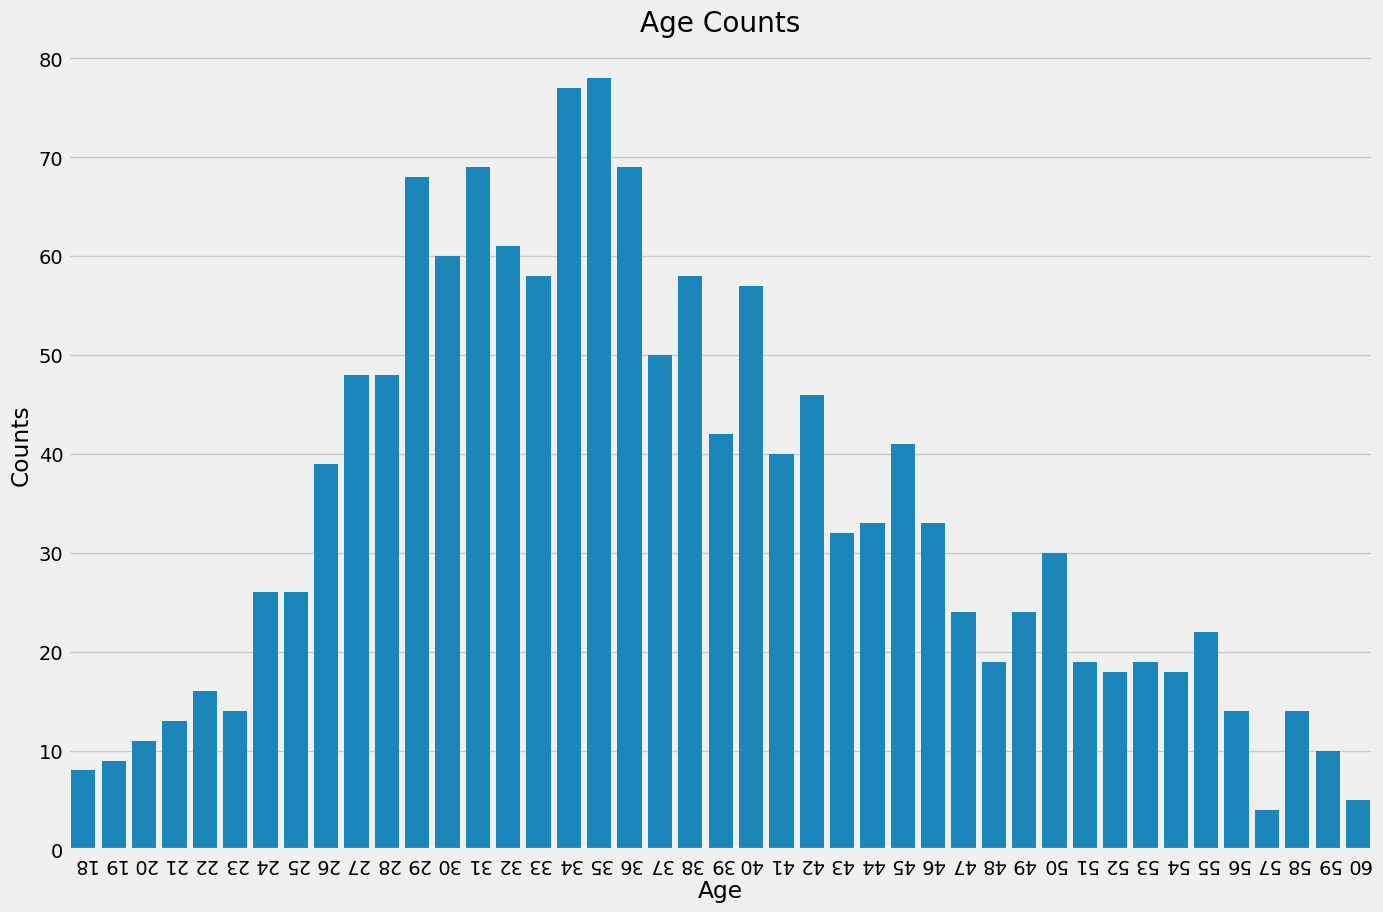

In [46]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

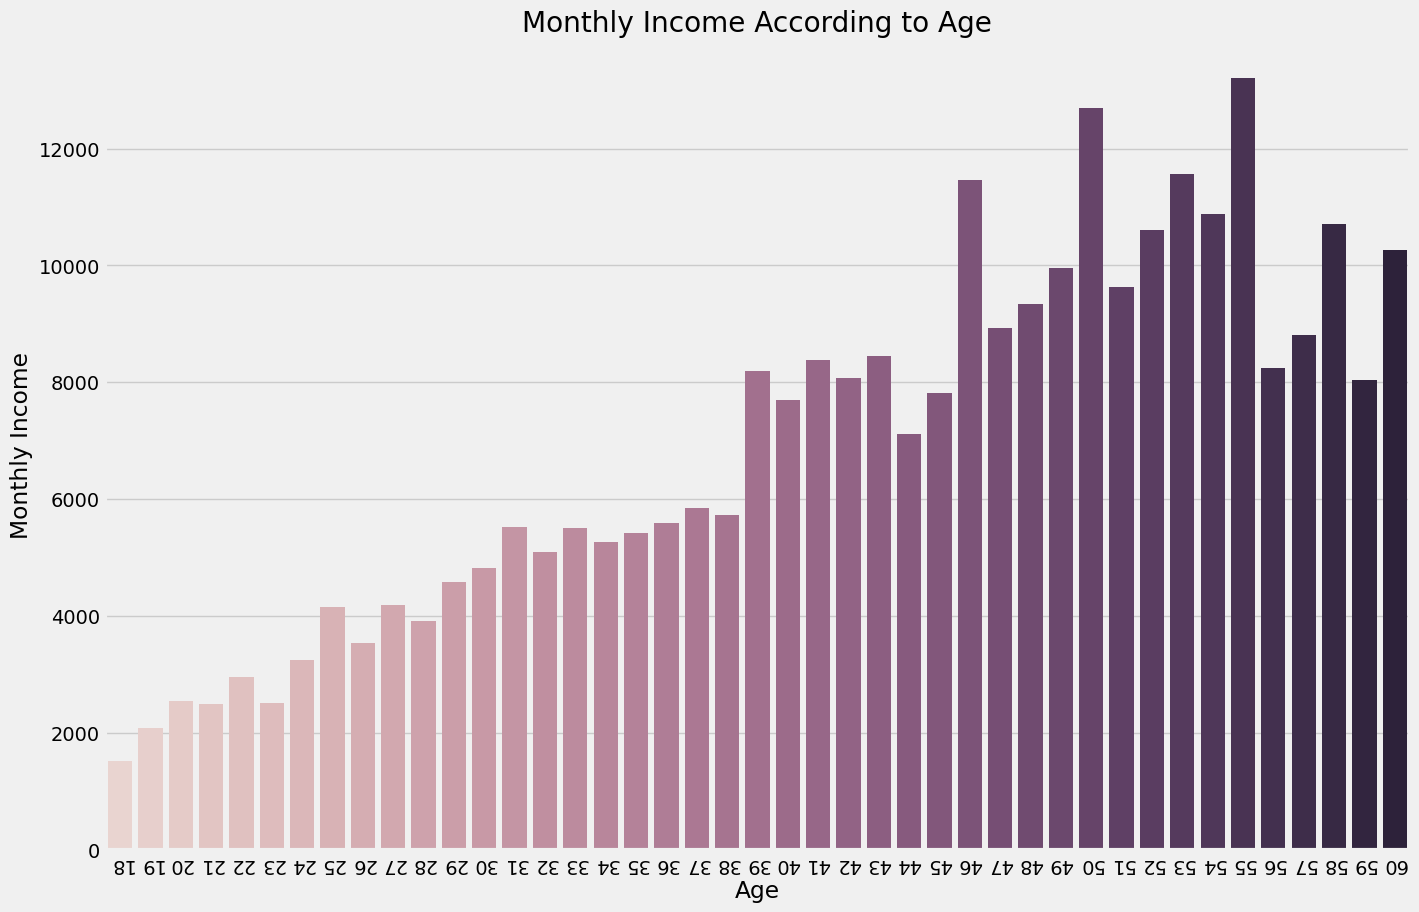

In [47]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

In [48]:
# creating a dataframe called income based on the jobroles
income=pd.DataFrame(data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

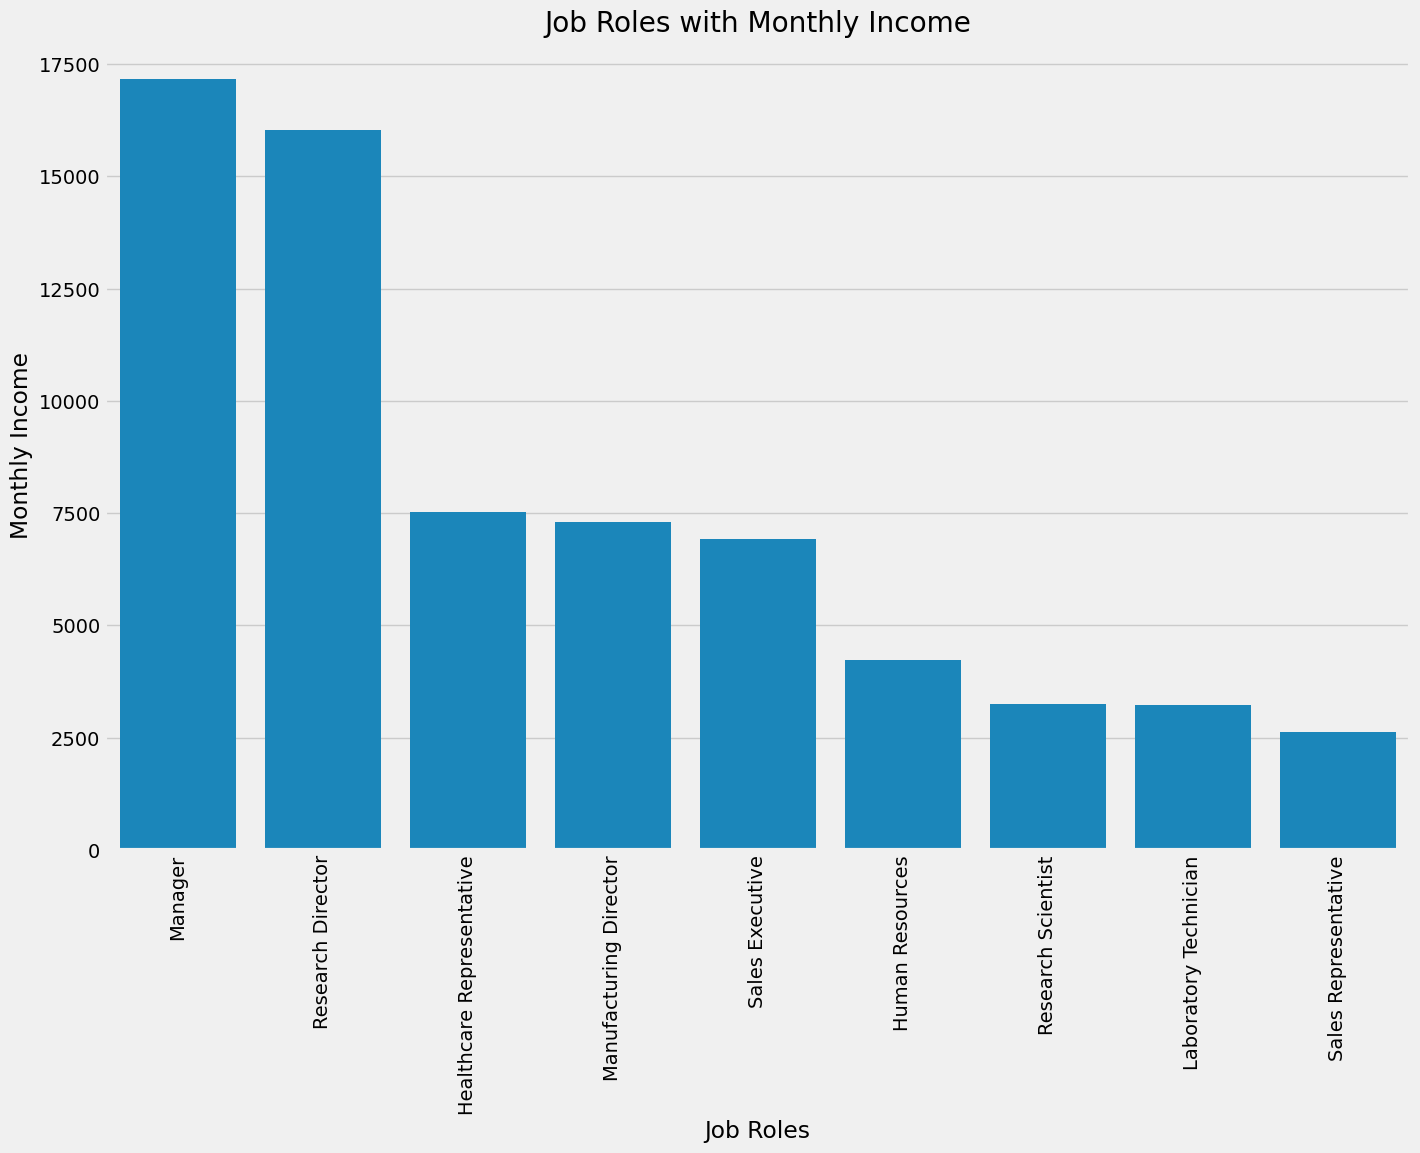

In [49]:
# showing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [50]:
# a dataframe with mean of the selected columns grouped by job role
#jobrole=pd.DataFrame(data.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
#jobrole

# Create a DataFrame with mean of the selected columns grouped by job role
selected_columns = ["PercentSalaryHike", "YearsAtCompany", "TotalWorkingYears", "YearsInCurrentRole", "WorkLifeBalance"]
jobrole = data.groupby("JobRole")[selected_columns].mean()
jobrole

PercentSalaryHike  YearsAtCompany  \
JobRole                                                        
Healthcare Representative          15.450382        8.374046   
Human Resources                    14.807692        5.326923   
Laboratory Technician              15.046332        5.019305   
Manager                            15.137255       14.431373   
Manufacturing Director             15.593103        7.600000   
Research Director                  14.950000       10.937500   
Research Scientist                 15.448630        5.113014   
Sales Executive                    14.889571        7.496933   
Sales Representative               15.674699        2.915663   

                           TotalWorkingYears  YearsInCurrentRole  \
JobRole                                                            
Healthcare Representative          14.068702            4.862595   
Human Resources                     8.173077            3.134615   
Laboratory Technician               7.656371            3.200772   
Manager                            24.549020            6.450980   
Manufacturing Director             12.786207            4.972414   
Research Director                  21.400000            6.287500   
Research Scientist                  7.715753            3.273973   
Sales Executive                    11.101227            4.855828   
Sales Representative                4.674699            2.012048   

                           WorkLifeBalance  
JobRole                                     
Healthcare Representative         2.702290  
Human Resources                   2.923077  
Laboratory Technician             2.718147  
Manager                           2.774510  
Manufacturing Director            2.765517  
Research Director                 2.862500  
Research Scientist                2.678082  
Sales Executive                   2.803681  
Sales Representative              2.891566

#### creating a pie chart based on the educational field.



In [51]:
labels=data.EducationField.value_counts().index
labels

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object', name='EducationField')

In [52]:
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]

In [53]:
sizes=data.EducationField.value_counts().values
sizes

array([606, 464, 159, 132,  82,  27], dtype=int64)

Text(0.5, 1.0, 'Education Field Counts')

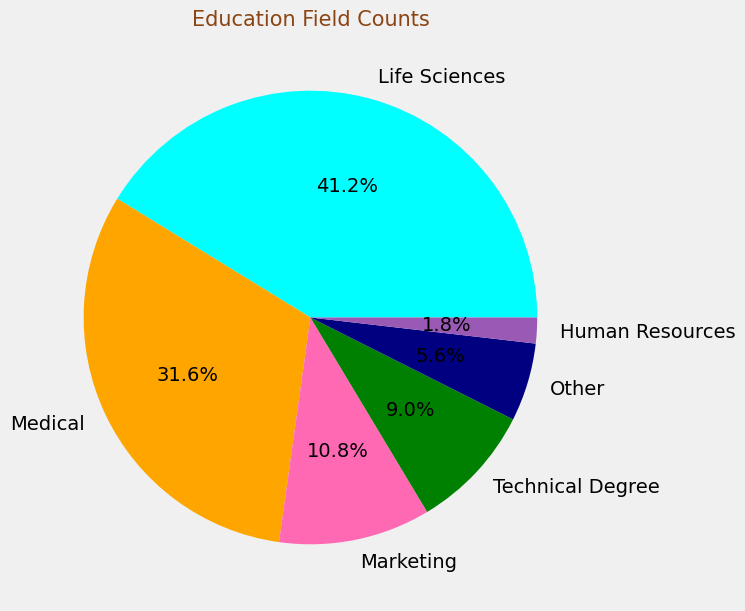

In [54]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

All the exploratory data analysis above shall help the HR team to find a pattern or find and filter the criteria which are most reponsible for attrition.